<h1> MTH4000 Programming in Python I</h1>
<h2> Week 10 Lab Workbook (Solutions)</h2>
<h3><em> Dr Matthew Lewis and Prof. Thomas Prellberg </em></h3>

In these exercises, we will look deeper into dealing with composite data and NumPy.

<h2> Exercise 1: <em>Hypercubes</em> </h2>

Hypercubes are generalisations of three-dimensional cubes into other dimensions.

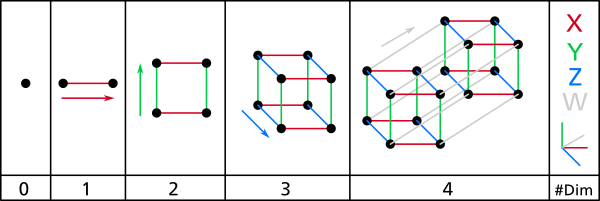

We successively get point, line, square, cube, tesseract, ...

The figure suggests that we can build up a hypercube of dimension $d+1$ by connecting two copies of a hypercube of dimension $d$.  This setup appears to lend itself to a recursive argument.

While it is hard to visualise constructions in dimensions above three, there is a very easy way to describe a $d$-dimensional hypercube: the coordinates of each of the $2^d$ corners are given by a sequence of $d$ zeros and ones.  In other words, we can use it to visualise binary numbers.

<h3> Exercise 1.1: <em> Hypercube Corners </em> </h3>

Write a function <code>hypercube_corners</code> that accepts a non-negative integer $d$ and returns a list of coordinates of all $2^d$ corners of a $d$-dimensional hypercube.

There are many ways of doing this.  One way is to take the coordinates for a $(d-1)$-dimensional hypercube and append a zero or a one.  Another way is to use bitwise logic.  All you need to know is that the expression <code>x <span style="color: rgb(170, 34, 255); font-weight: bold;">&</span> <span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>k</code> is non-zero if the binary expansion of the value $x$ contains $2^k$.

In [1]:
# Solution 1: (Using recursion)

def hypercube_corners(d):
    if d==0:
        return [[]]
    else:
        # Build up d from d-1.
        l = hypercube_corners(d-1)
        new_l = []
        for p in l:
            new_l.append(p+[0])
            new_l.append(p+[1])
        return new_l
    
for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [0, 1], [1, 0], [1, 1]]
3 [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


In [2]:
# Solution 2: (Using binary expansion)

def hypercube_corners(d):
    bit = lambda x, k: int(x&2**k>0)
    return [[bit(x, k) for k in range(d)] for x in range(2**d)]

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [1, 0], [0, 1], [1, 1]]
3 [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


<h3> Exercise 1.2: <em> One-Liner for Hypercube Corners <span style="color: red;">(Difficult)</span></em> </h3>

Write a one-line <code><span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span></code> function <code>hypercube_corners</code> that completes the task set in Exercise 1.1.

In [3]:
# Solution 1:
# Taking the above idea and forcing it into one line.  We need two list comprehensions. Sorting is not needed but aesthetically pleasing.

hypercube_corners = lambda d:[[]] if d==0 else sorted([p+[0] for p in hypercube_corners(d-1)]+[p+[1] for p in hypercube_corners(d-1)])

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [0, 1], [1, 0], [1, 1]]
3 [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


In [4]:
# Solution 2:
# This is easiest to convert from above.

hypercube_corners = lambda d:[[int(x&2**k>0) for k in range(d)] for x in range(2**d)]

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [1, 0], [0, 1], [1, 1]]
3 [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


In [5]:
# Solution 3:
# Observe that we can use binary numbers and mess about with strings.

hypercube_corners = lambda d:[[int(c) for c in bin(i)[2:].zfill(d)] for i in range(2**d)]

for d in range(4):
    print(d, hypercube_corners(d))

0 [[0]]
1 [[0], [1]]
2 [[0, 0], [0, 1], [1, 0], [1, 1]]
3 [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


<h3> Exercise 1.3: <em> Hypercube Debugging </em> </h3>

A coder has decided to code up the above problem in the following way.

In [6]:
bit = lambda x, k: int(x&2**k>0) # Returns one if x contains 2^k.

def hypercube_corners(d):
    l = [[]]*2**d # Create a list with 2^d empty lists to append to individually.
    for k in range(d): # For all the coordinates.
        for x in range(2**d): # For all the points.
            l[x].append(bit(x,k)) # Append zero or one to each list.
    return l

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0, 1], [0, 1]]
2 [[0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1]]
3 [[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]]


The idea seems sound, but the results are clearly incorrect. Identify the problem and fix it.

In [7]:
# The problem is that [[]]*2**d creates a list with l identical references to the same empty list [].
# To fix this, we need to initialise different instances of empty lists in l.

bit = lambda x,k: int(x&2**k>0) # Returns one if x contains 2^k.

def hypercube_corners(d):
    l=[[] for _ in range(2**d)] # Fix: use list comprehension (or for loop). This creates different empty lists.
    for k in range(d):
        for x in range(2**d):
            l[x].append(bit(x, k))
    return l

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [1, 0], [0, 1], [1, 1]]
3 [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


<h3> Exercise 1.4: <em> Hamming Distance </em> </h3>

The Hamming distance is the distance between two binary numbers as measured by the number of differing bits. It represents the minimal number of times a bit needs to be changed in order to transform one number into the other.

Geometrically, each such bit change corresponds to an edge traversal on a hypercube, so this is the same as the minimal number of edges on the hypercube that separate the two corresponding corners. 

Write a function <code>hamming</code> that accepts two positive integers <code>x</code> and <code>y</code>, and computes their Hamming distance when they are written as binary numbers. 

(<b>Note:</b> If you use the <code>bin</code> function before the comparison you might need to pad the strings with leading zeros.)

In [8]:
def hamming(x, y):
    bin_x = bin(x)[2:]
    bin_y = bin(y)[2:]
    n_x = len(bin_x)
    n_y = len(bin_y)
    d = max(n_x, n_y)
    bin_x = bin_x.zfill(d)
    bin_y = bin_y.zfill(d)
    return sum([i!=j for i, j in zip(bin_x, bin_y)])

hamming(3, 9)

2

<h3> Exercise 1.5: <em> One-Liner for Hamming Distance </em> </h3>

Write a one-line <code><span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span></code> function <code>hamming</code> that completes the task set in Exercise 1.4.

In [9]:
# Count the ones in x XOR y.

hamming = lambda x, y: bin(x^y).count("1")

hamming(3,9)

2

<h2> Exercise 2: <em>ChatGPT</em> </h2>

<h3> Exercise 2.1: <em> ChatGPT's Hypercube Debugging </em> </h3>

Ask ChatGPT to provide feedback on the flawed code in Exercise 1.3.  (Do not do this before you have found the error in the code yourself.)

<b> Solution: ChatGPT provides a remarkably good answer (given below). </b>

The issue with the code lies in how the list <code>l</code> is created in the <code>hypercube_corners</code> function. Specifically, the line:

<pre style="font-family: consolas;">
l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> [[]]<span style="color: rgb(170, 34, 255); font-weight: bold;">*</span><span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d  <span style="color: rgb(1, 121, 121); font-style: italic"># create a list with 2^d empty lists</span>
</pre>

creates a list <code>l</code> with <code>2^d</code> <em>references</em> to the <b>same</b> empty list, rather than creating <code>2^d</code> independent empty lists. This means that appending to one sublist will affect all of them because they all point to the same object in memory.

<h3> Explanation </h3>
When you execute <code>l[x].append(bit(x, k))</code>, the <code>append</code> operation modifies the shared list in <code>l</code>, resulting in all entries in <code>l</code> having the same content. 

<h3> Solution </h3>
You need to create <code>2^d</code> independent lists. You can do this using a list comprehension:

<pre style="font-family: consolas;">
l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> [[] <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> _ <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d)]  <span style="color: rgb(1, 121, 121); font-style: italic"># create 2^d independent empty lists</span>
</pre>

<h3> Corrected Code </h3>
Here's how to fix the code:

<pre style="font-family: consolas;">
bit <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span> x, k: <span style="color: rgb(0, 136, 0);">int</span>(x <span style="color: rgb(170, 34, 255); font-weight: bold;">&</span> <span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>k > <span style="color: rgb(0, 136, 0);">0</span>)  <span style="color: rgb(1, 121, 121); font-style: italic"># returns one if x contains 2^k</span>

<span style="color: rgb(0, 128, 0); font-weight: bold;">def</span> <span style="color: rgb(0, 0, 254);">hypercube_corners</span>(d):
    l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> [[] <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> _ <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d)]  <span style="color: rgb(1, 121, 121); font-style: italic"># create a list of 2^d independent empty lists</span>
    <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> k <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(d):  <span style="color: rgb(1, 121, 121); font-style: italic"># for all the coordinates</span>
        <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> x <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d):  <span style="color: rgb(1, 121, 121); font-style: italic"># for all the points</span>
            l[x].append(bit(x, k))  <span style="color: rgb(1, 121, 121); font-style: italic"># add zero or one</span>
    <span style="color: rgb(0, 128, 0); font-weight: bold;">return</span> l

<span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> d <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">4</span>):
    <span style="color: rgb(0, 136, 0);">print</span>(d, hypercube_corners(d))
</pre>

This way, each entry in <code>l</code> will be an independent list, and your code should work as intended.

<h3> Exercise 2.2: <em> ChatGPT's Hypercube Counselling </em> </h3>

Ask ChatGPT to explain the (fixed) code to you. You will likely get a high-quality response.

<b> Solution: Again, ChatGPT's answer appears to be faultless. </b>

Certainly! The fixed code generates the coordinates of all the corners of a hypercube in \( d \) dimensions. Let me break it down step by step:

<h3> 1. The <code>bit</code> Lambda Function </h3>
<pre style="font-family: consolas;">
bit <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span> x, k: <span style="color: rgb(0, 136, 0);">int</span>(x <span style="color: rgb(170, 34, 255); font-weight: bold;">&</span> <span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>k > <span style="color: rgb(0, 136, 0);">0</span>)</pre>
<ul>
    <li><b>Purpose</b>: This function checks if the \( k \)th bit of the integer \( x \) is set (i.e., is 1).
    <li><b>Explanation</b>:<ul>
        <li><code>2**k</code> represents a number where only the \( k \)th bit is 1 (e.g., for \( k=2 \), \( 2^2 = 4 \) is `0b100`).</li>
        <li><code>x & 2**k</code> performs a bitwise AND operation, which checks if the \( k \)th bit in \( x \) is 1.</li>
        <li>The comparison <code>&gt; 0</code> returns <code>True</code> (or 1) if the \( k \)th bit is set, and <code>False</code>(or 0) otherwise.</li></ul>
    <li><code>int(...)</code> converts this result into an integer (0 or 1).</li>
</ul>

<h3> 2. The <code>hypercube_corners</code> Function </h3>

<pre style="font-family: consolas;">
bit <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> <span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span> x, k: <span style="color: rgb(0, 136, 0);">int</span>(x <span style="color: rgb(170, 34, 255); font-weight: bold;">&</span> <span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>k > <span style="color: rgb(0, 136, 0);">0</span>)  <span style="color: rgb(1, 121, 121); font-style: italic"># returns one if x contains 2^k</span>

<span style="color: rgb(0, 128, 0); font-weight: bold;">def</span> <span style="color: rgb(0, 0, 254);">hypercube_corners</span>(d):
    l <span style="color: rgb(170, 34, 255); font-weight: bold;">=</span> [[] <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> _ <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d)]  <span style="color: rgb(1, 121, 121); font-style: italic"># create a list of 2^d independent empty lists</span>
    <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> k <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(d):  <span style="color: rgb(1, 121, 121); font-style: italic"># for all the coordinates</span>
        <span style="color: rgb(0, 128, 0); font-weight: bold;">for</span> x <span style="color: rgb(0, 128, 0); font-weight: bold;">in</span> <span style="color: rgb(0, 136, 0);">range</span>(<span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>d):  <span style="color: rgb(1, 121, 121); font-style: italic"># for all the points</span>
            l[x].append(bit(x, k))  <span style="color: rgb(1, 121, 121); font-style: italic"># add zero or one to the coordinate at index x</span>
    <span style="color: rgb(0, 128, 0); font-weight: bold;">return</span> l</pre>

<ul>
    <li><b>Inputs</b>:<ul>
        <li><code>d</code>: The number of dimensions of the hypercube.</li></ul>
    <li><b>Explanation</b>:<ul>
        <li><code>l = [[] for _ in range(2**d)]</code> creates a list with \( 2^d \) independent sublists to store the coordinates of each corner of the hypercube.</li>
    <li><code>for k in range(d)</code>: Iterates over each dimension from 0 to \( d-1 \).</li>
    <li><code>for x in range(2**d)</code>: Iterates over all the possible \( 2^d \) points (corners) of the hypercube.</li>
    <li><code>l[x].append(bit(x, k))</code>: Calculates the \( k \)th coordinate of the \( x \)th corner and appends it to the corresponding sublist in <code>l</code>.</li></ul>
</ul>

<h3> 3. Output of <code>hypercube_corners(d)</code> </h3>
<ul><li> Each sublist in <code>l</code> represents the binary coordinates of a corner of the \( d \)-dimensional hypercube.</li>
    <li>For example:<ul>
        <li>For \( d = 0 \), the output is <code>[[]]</code> (a single point, the "0-dimensional" corner).</li>
        <li>For \( d = 1 \), the output is <code>[[0], [1]]</code> (two points, representing the 0 and 1 corners of a line).</li>
        <li>For \( d = 2 \), the output is <code>[[0, 0], [1, 0], [0, 1], [1, 1]]</code> (four points representing the corners of a square).</li>
        <li>For \( d = 3 \), the output is <code>[[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]</code> (eight points representing the corners of a cube).</li></ul>

<h3> How It Works </h3>
<ul><li>The binary representation of \( x \) indicates which corners of the hypercube are being generated.</li>
    <li>The <code>bit</code> function helps populate the \( k \)th coordinate of each corner by checking the corresponding bit in \( x \). If the bit is 1, it adds a 1 at that coordinate; if 0, it adds a 0.</li>
    <li>The nested loops build each corner's coordinates one dimension at a time.</li></ul>

This approach allows for generating all the vertices of a hypercube in \( d \) dimensions, represented in binary as lists of 0s and 1s.

<h2> Exercise 3: <em>Central Limit Theorem</em> </h2>

For the next exercise, we will need the following imports.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In <em>MTH4500 Probability and Statistics</em> you will learn that repeated sampling from some distribution with mean $\mu$ and variance $\sigma^2$ will be well-approximated by a normal distribution, in the sense that the sum of random variables $X_k$ sampled from that distribution is for large $N$ close to a normal distributed random variable $Y$ with mean $n\mu$ and variance $n\sigma^2$:

$$X=X_1+X_2+\ldots+X_n\approx Y$$

In this exercise we will numerically test this assertion.

NumPy allows for easy generation of arrays of random numbers. For example, if we want to have $10000$ random numbers drawn from the uniform distribution on $[0,1]$, we can use the following code.

In [11]:
# Generate 10000 random numbers.
a = np.random.uniform(0, 1, 10000)

Instead of looking at these random numbers, we can visualise them with histograms using the <code>hist</code> function in the PyPlot module, with optional parameters such as the number of bins and the range that the bins should cover.

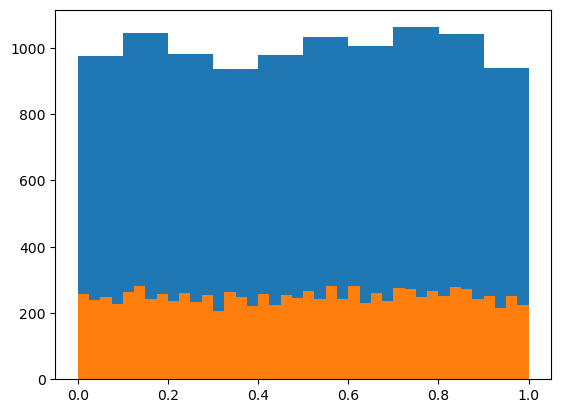

In [12]:
# Draw default histogram.
plt.hist(a)

# Draw histogram using 40 bins.
plt.hist(a, range=[0,1], bins = 40)
plt.show()

Clearly, the more bins we use, the fewer samples we will find in each of them.

The uniform distribution on $[0,1]$ has mean $\mu=1/2$ and variance $\sigma^2=1/12\approx0.0833$. We can confirm this quickly by computing mean and variance of our sampled $10000$ random numbers.

In [13]:
print (f"mean: {a.mean():.4f}, variance: {a.var():.4f}")

mean: 0.5014, variance: 0.0828


To work towards the Central Limit Theorem, let us first consider taking the sum of two random variables. To practice working with NumPy, we created a $2 \times 10000$ array filled with random numbers and then take the column sum.

In [14]:
# Generate 2x10000 random numbers.
a2 = np.random.uniform(0, 1, (2, 10000))
a2_sum = a2.sum(axis = 0)

And again, instead of looking at the numbers, it is more instructive to plot the histogram.

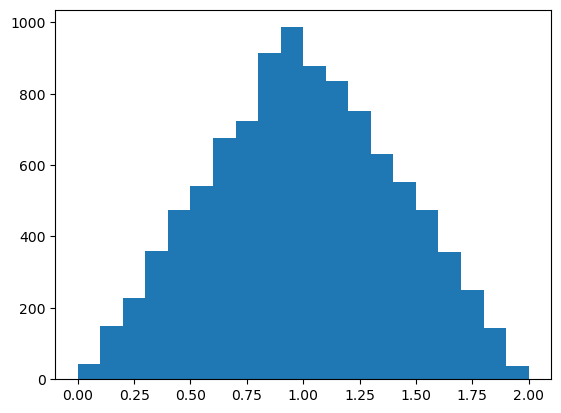

In [15]:
# Draw histogram.
plt.hist(a2_sum,bins=20,range=[0,2])
plt.show()

In [16]:
print (f"mean: {a2_sum.mean():.4f}, variance: {a2_sum.var():.4f}")

mean: 0.9989, variance: 0.1650


The mean and variance have roughly doubled, as expected. You may also recognise a piecewise linear tent-shaped distribution. 

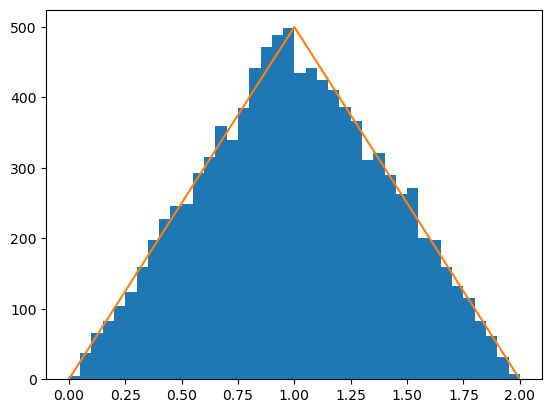

In [17]:
plt.hist(a2_sum, bins=40, range=[0,2])
x = np.linspace(0, 2, 1000)
y = 1-np.abs(1-x)
plt.plot(x, 500*y)
plt.show()

How did we arrive at a factor of $500$ in the plot of the distribution?

Clearly $1-|1-x|$ is normalised to $1$, so to map it to match the histogram, we need to multiply it with the sample size $10000$ and the bin width $2/40$, which gives $500$.

<h3> Exercise 3.1: <em> Verify the Statement of the Central Limit Theorem </em> </h3>

Of course the Central Limit Theorem is not just a statement about the growth of the mean and the variance, but about a convergence to the normal distribution. In other words, the distribution of $X=\sum_{i=1}^n X_i$ should be normally distributed. To test this, we need to not only take the sum of two random variables, as in our example above, but of a larger number of these.

For $n=10$, $30$, and $100$, plot the resulting histograms and the corresponding <a href="https://en.wikipedia.org/wiki/Normal_distribution">normal distribution</a> (make sure to scale this appropriately by the number of samples).

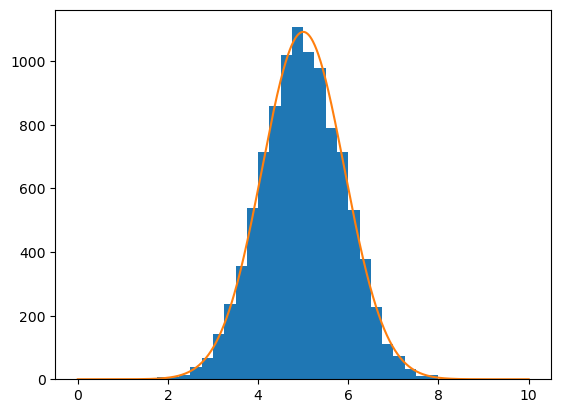

In [18]:
S = 10000
N = 10
B = 40
a = np.random.uniform(0, 1, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum, bins = B, range = [0, N])
x = np.linspace(0, N, 1000)
mu = N*1/2
var = N*1/12
y = S*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

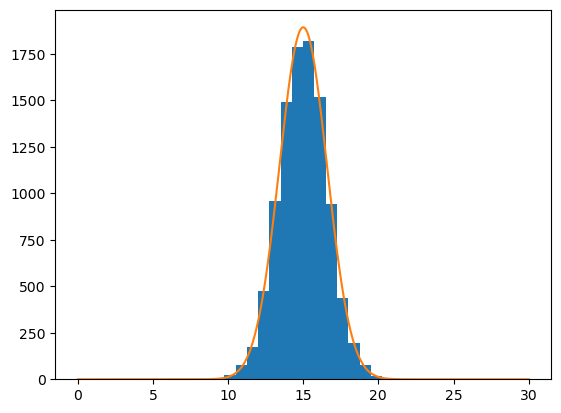

In [19]:
S = 10000
N = 30
B = 40
a = np.random.uniform(0, 1, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum, bins = B, range = [0, N])
x = np.linspace(0, N, 1000)
mu = N*1/2
var = N*1/12
y = S*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

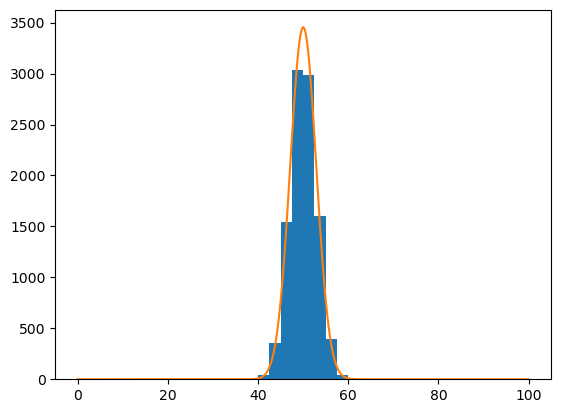

In [20]:
S = 10000
N = 100
B = 40
a = np.random.uniform(0, 1, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum, bins = B, range = [0, N])
x = np.linspace(0, N, 1000)
mu = N*1/2
var = N*1/12
y = S*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

<h3> Exercise 3.2: <em> Repeat this for the Exponential Distribution with Parameter $\lambda = 1$ </em> </h3>

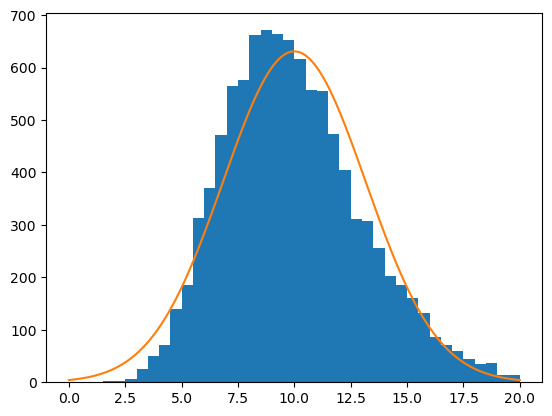

In [21]:
la = 1
S = 10000
N = 10
B = 40
a = np.random.exponential(la, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum,bins = B, range = [0, 2*N])
x = np.linspace(0, 2*N, 1000)
mu = N*1/la
var = N*1/la**2
y = S*2*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

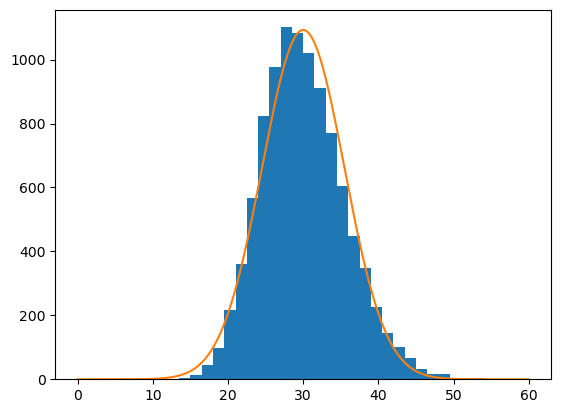

In [22]:
la = 1
S = 10000
N = 30
B = 40
a = np.random.exponential(la, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum, bins = B, range = [0, 2*N])
x = np.linspace(0, 2*N, 1000)
mu = N*1/la
var = N*1/la**2
y = S*2*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

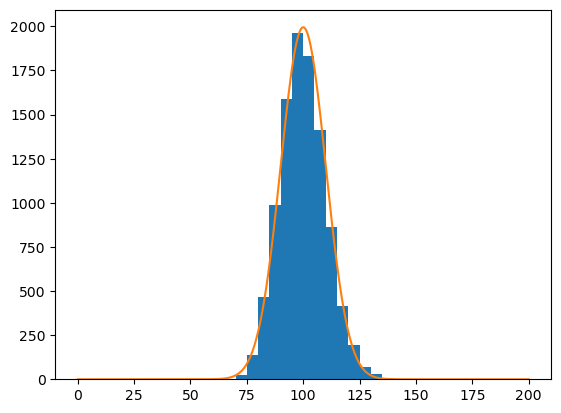

In [23]:
la = 1
S = 10000
N = 100
B = 40
a = np.random.exponential(la, (N, S))
a_sum = a.sum(axis = 0)
plt.hist(a_sum,bins = B, range = [0, 2*N])
x = np.linspace(0, 2*N, 1000)
mu = N*1/la
var = N*1/la**2
y = S*2*N/B*np.exp(-(x-mu)**2/(2*var))/np.sqrt(2*np.pi*var)
plt.plot(x, y)
plt.show()

<h2> Feedback </h2>

Attempt all of these questions during Week 10. This worksheet will be discussed in detail on a Lab Walkthrough video to be posted to QMplus at the end of the week.

If you have any problems or questions, or simply you would like some feedback, then you can:

<ul>
    <li> Ask the tutors present in your IT Lab sessions.</li><br>
    <li> Ask the Student Forum on the module's QM Plus page.</li><br>
    <li> Email the lecturers for assistance.</li>
</ul>